## HW1 - Alicia Sudlerd

#### Exercise 1.1. Accessing the course virtual machine on UT HPC cloud
SSH created and to be discussed with the prefessor.

#### Exercise 1.2.1 Measuring time

disclaimer: the program below is from the class Parallel Computing 2022/23 fall: U of Tartu

In [74]:
import time

sum = 0
start = time.time()

for i in range(10**3):
   sum += i
   

end = time.time()
print("sum = ",sum, " Wall time: ",end-start)

sum =  499500  Wall time:  0.0


sum =  49999995000000  Wall time:  0.6831529140472412    range(10**7)
sum =  499500          Wall time:  0.0010006427764892578 range(10**3)

#### Exercise 1.2.2 - NumPy tutorial
Learning it :)

#### Exercise 1.2.3 Curve fitting

disclaimer: the program below is from the class Parallel Computing 2022/23 fall: U of Tartu

time of n = 123  is  0.0010001659393310547


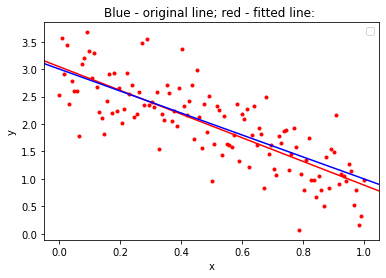

In [13]:
# file: leastsquares.py
# 2D point cloud fitting with a line
# run with: $ python leastsquares.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def newline(p1, p2, color):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax],color=color)
    ax.add_line(l)
    return l

n= 123 ; x = np.linspace(0.0, 1.0, n)

start = time.time()

y_line = -2*x + 3 # original line
# generate a cloud of points randomly away from the original line:
y = y_line + np.random.normal(0, 0.55, n)
A = np.array([x, np.ones(n)])
#print ('A=',A)
A = A.transpose()
#print ('A.transpose()=',A)
# Solve a least squares problem to find best constants to define a fitting line:
result = np.linalg.lstsq(A, y, rcond=None)
#print ('result=',result)
a, b = result[0]
p=[(x[i],y[i]) for i in range(len(x))]
p0 = (0,a*0 + b); p1 = (1,a*1 + b)

end = time.time()
print("time of n =",n," is ",end-start)

plt.figure(1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Blue - original line; red - fitted line: ')
plt.legend(['Legend'])
plt.plot(x, y, 'r.')
newline(p0,p1,'red')
newline((0,3),(1,1),'blue')
plt.show()

disclaimer: I adapt 3D plotting methods from 
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

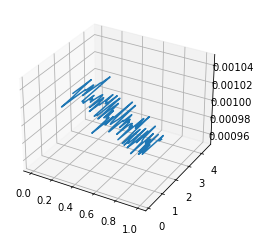

In [40]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
plt.zline = A
plt.xline = x
plt.yline = y
ax.plot3D(x, y, end - start)
plt.show()

#### Exercise 1.3.1 Recursive and iterative algorithm

In [10]:
import time
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

counter = 0; 

def my_fib(n):
    global counter;

    counter += 1; 
    if n == 0:
        return 0;
    elif n == 1:
        return 1;
    else:
        return my_fib(n-1) + my_fib(n-2);

Fionacci of 4,7,14,21 

itr4 = 3 : time 1.663022930605717e+16
rcr4 = 3 : time 1.663022930605717e+16 

itr7 = 13 : time 1.663022930606717e+16
rcr7 = 13 : time 1.663022930606717e+16 

itr14 = 377 : time 1.663022930606717e+16
rcr14 = 377 : time 1.663022930606717e+16 

itr21 = 10946 : time 1.663022930607259e+16
rcr21 = 10946 : time 1.6630229306127204e+16 



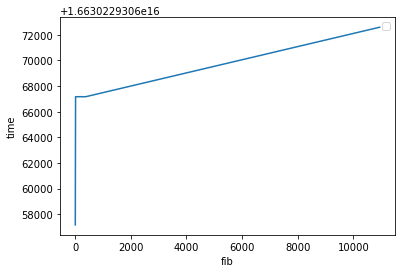

In [62]:
import time
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#Iterative fibonacci series, gives the complexity of O(n)
itr_counter = 0

def itr_fib(n):
    global itr_counter
    if n == 0:
        return 0
    else:
        fib = [0]*n
        fib.insert(1,1)
        result = 0
        for i in range(2,n+1): 
            itr_counter +=1
            fib[i] = fib[i-1] + fib[i-2] 


    return fib[n]




print("Fionacci of 4,7,14,21 \n")

multiplier = 10000000

start = time.time()
itr4 = itr_fib(4)
end = time.time() * multiplier
timeitr4 = end-start;
print("itr4 = {} : time {}".format(itr4,timeitr4))

start = time.time()
recur4 = my_fib(4)
end = time.time() * multiplier
timerecur4 = end-start;
print("rcr4 = {} : time {} \n".format(recur4,end-start))

start = time.time()
itr7 = itr_fib(7)
end = time.time() * multiplier
timeitr7 = end-start;
print("itr7 = {} : time {}".format(itr7,end-start))


start = time.time()
recur7 = my_fib(7)
end = time.time() * multiplier
timerecur7 = end-start;
print("rcr7 = {} : time {} \n".format(recur7,end-start))

start = time.time()
itr14 = itr_fib(14)
end = time.time() * multiplier
timeitr14 = end-start;
print("itr14 = {} : time {}".format(itr14,end-start))

start = time.time()
recur14 = my_fib(14)
end = time.time() * multiplier
timerecur14 = end-start;
print("rcr14 = {} : time {} \n".format(recur14,end-start))

start = time.time()
itr21 = itr_fib(21)
end = time.time() * multiplier
timeitr21 = end-start;
print("itr21 = {} : time {}".format(itr21,end-start))

start = time.time()
recur21 = my_fib(21)
end = time.time() * multiplier
timerecur21 = end-start;
print("rcr21 = {} : time {} \n".format(recur21,end-start))


plt.figure(2)
plt.xlabel('fib')
plt.ylabel('time')
plt.legend(['Legend'])
xitr = [itr_fib(4), itr_fib(7), itr_fib(14), itr_fib(21)]
time = [timeitr4, timeitr7, timeitr14, timeitr21]
plt.plot(xitr,time)
plt.show()





By laws, recursion runs slower as it calls self many times and jump upward once it can't call itself anymore
while loop iterates in linear.

#### Exercise 1.3.2 The matrix-theoretic algorithm

In [73]:
import numpy as np
F0 = np.matrix([[0,1],[1,1]])

def power(x,n):
    """
    INPUT:
        x - a number
        n - an integer > 0
    OUTPUT:
        x**n
    EXAMPLES:
        >>> power(3,13)
        1594323
        >>> 3**(13)
        1594323
    """
    if n == 1:
        return x
    if n%2 == 0:
        return power(x, int(n/2))**2
    if n%2 == 1:
        return x*power(x, int((n-1)/2))**2

print(F)
print(power(F,8))
##print(power(166,88))

[[0 1]
 [1 1]]
[[13 21]
 [21 34]]
